In [1]:
import sys
sys.path.append('../')

from model import DecisionTree
from rule import RuleExtractor
from sklearn.model_selection import KFold

import os
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

warnings.filterwarnings(action='ignore')

In [2]:
embed_model = 'srgnn'
filename = {'sage' : 'user_embedding_sage_sid_6to6_weighted.npy', 'srgnn' : 'srgnn_user_hybrid_6to6_weighted.npy'}
data_path = "../data/"

ptitle_pivot_df = pd.read_csv(os.path.join(data_path, 'pivot_ptitle_data.csv'), index_col=0)
genre_pivot_df = pd.read_csv(os.path.join(data_path, 'pivot_genre2_data.csv'), index_col=0)
embedding = np.load(os.path.join(data_path, filename[embed_model]))
k = 15

In [3]:
kf = KFold(n_splits = 10, shuffle = True, random_state = 42)
n_fold = 0
k_fold_result = []

for train_idx, valid_idx in kf.split(ptitle_pivot_df):
    model = DecisionTree(ptitle_pivot_df, embedding)
    model.validation = True
    n_fold += 1
    model.x_train, model.y_train = model.X[train_idx], model.Y[train_idx]
    model.x_valid, model.y_valid = model.X[valid_idx], model.Y[valid_idx]

    result = []
    dt = model.make_dt(min_samples_leaf=25, min_impurity_decrease=0.0007)
    
    score = model.get_score(dt, scoring='all')
    val_score = model.get_valid_score(dt, scoring='all')
    result.extend(score)
    result.extend(val_score)

    k_fold_result.append(result)

ptitle_result = pd.DataFrame(k_fold_result, columns=['recall', 'precision', 'f1_score', 'valid_recall', 'valid_precision', 'valid_f1_score'])
ptitle_result.mean()

recall             0.455996
precision          0.489954
f1_score           0.458505
valid_recall       0.305483
valid_precision    0.315125
valid_f1_score     0.297707
dtype: float64

In [4]:
kf = KFold(n_splits = 10, shuffle = True, random_state = 42)
n_fold = 0
k_fold_result = []

for train_idx, valid_idx in kf.split(genre_pivot_df):
    model = DecisionTree(genre_pivot_df, embedding)
    model.validation = True
    n_fold += 1
    print(f'{n_fold} Fold ...')
    model.x_train, model.y_train = model.X[train_idx], model.Y[train_idx]
    model.x_valid, model.y_valid = model.X[valid_idx], model.Y[valid_idx]

    result = []
    dt = model.make_dt(min_samples_leaf=25, min_impurity_decrease=0.0007)
    
    score = model.get_score(dt, scoring='all')
    val_score = model.get_valid_score(dt, scoring='all')
    result.extend(score)
    result.extend(val_score)

    k_fold_result.append(result)
    
genre_result = pd.DataFrame(k_fold_result, columns=['recall', 'precision', 'f1_score', 'valid_recall', 'valid_precision', 'valid_f1_score'])
genre_result.mean()

recall             0.497837
precision          0.545394
f1_score           0.510589
valid_recall       0.378364
valid_precision    0.406292
valid_f1_score     0.377890
dtype: float64

1 Fold ...


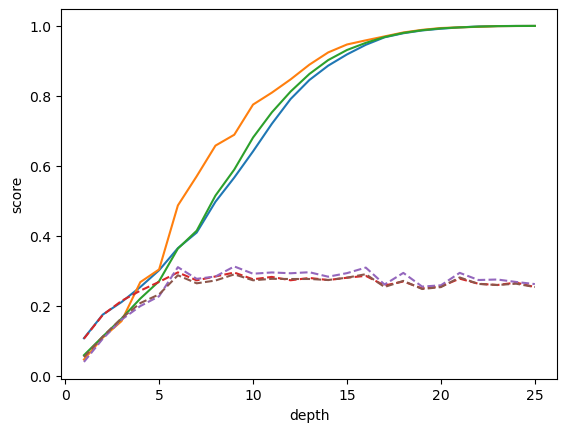

2 Fold ...


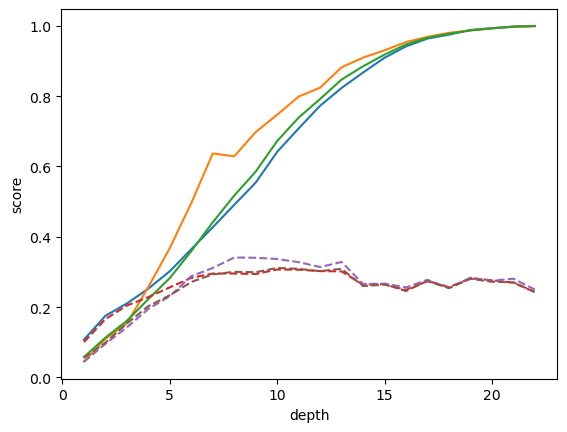

3 Fold ...


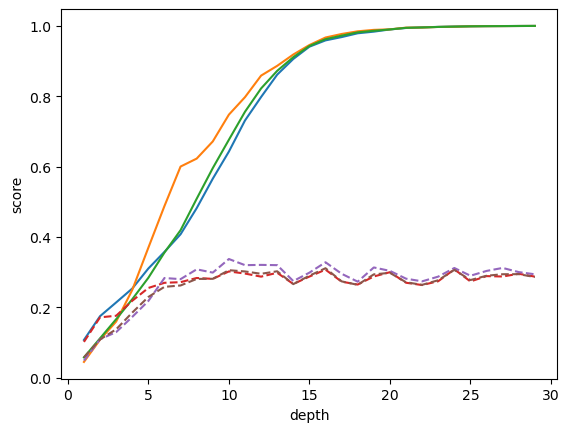

4 Fold ...


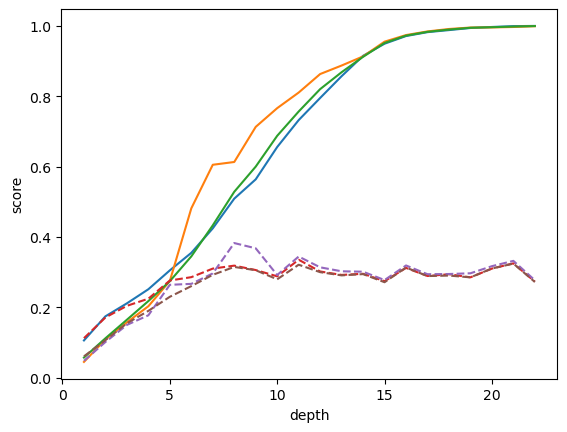

5 Fold ...


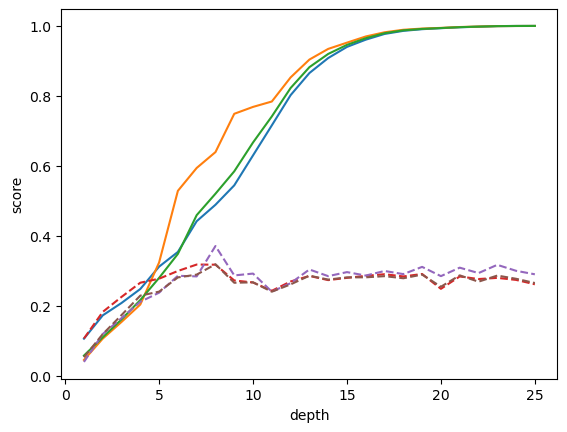

6 Fold ...


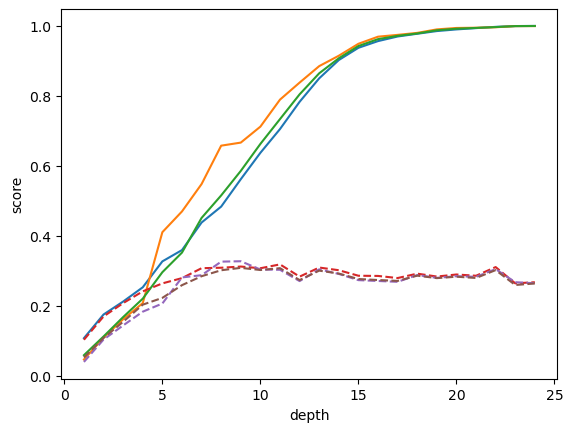

7 Fold ...


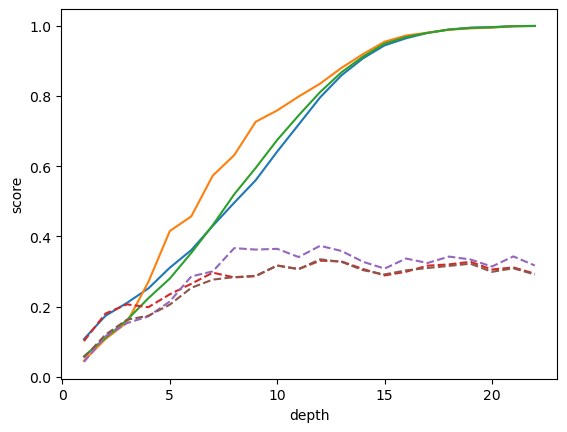

8 Fold ...


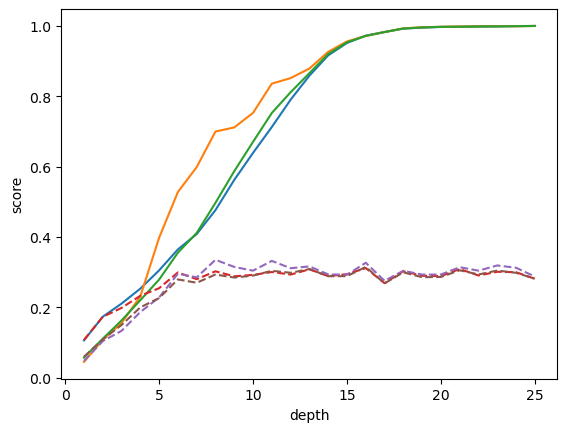

9 Fold ...


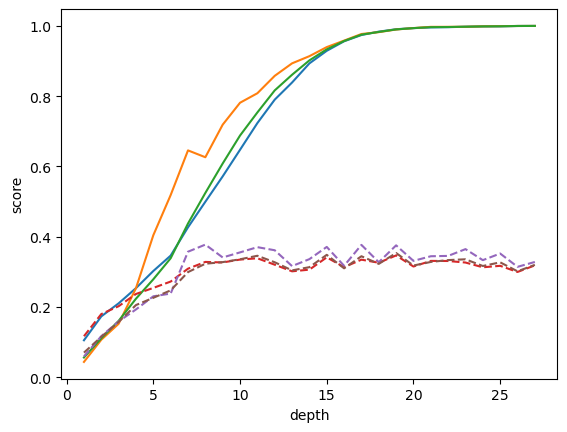

10 Fold ...


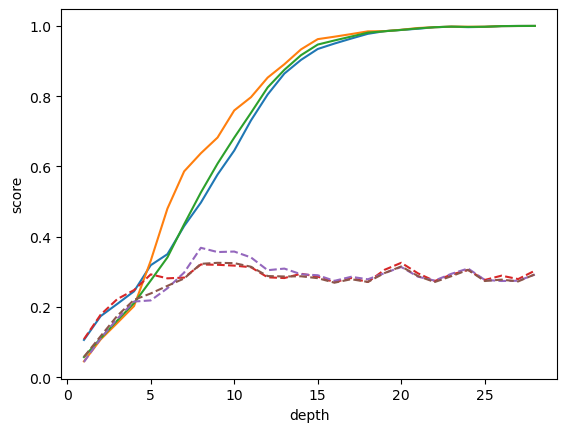

In [11]:
kf = KFold(n_splits = 10, shuffle = True, random_state = 42)
n_fold = 0
k_fold_result = []

for train_idx, valid_idx in kf.split(ptitle_pivot_df):
    model = DecisionTree(ptitle_pivot_df, embedding)
    model.validation = True
    n_fold += 1
    print(f'{n_fold} Fold ...')
    model.x_train, model.y_train = model.X[train_idx], model.Y[train_idx]
    model.x_valid, model.y_valid = model.X[valid_idx], model.Y[valid_idx]

    score_list, val_score_list = model.get_all_depth(scoring='all', visualize=False)

    r_list = [] 
    p_list = []
    f_list = []

    vr_list = [] 
    vp_list = []
    vf_list = []

    for score, val_score in zip(score_list, val_score_list):
        r_list.append(score[0])
        p_list.append(score[1])
        f_list.append(score[2])

        vr_list.append(val_score[0])
        vp_list.append(val_score[1])
        vf_list.append(val_score[2])

    plt.plot(range(1, len(score_list)+1), r_list, label='train recall')
    plt.plot(range(1, len(score_list)+1), p_list, label='train precision')
    plt.plot(range(1, len(score_list)+1), f_list, label='train f1-score')

    plt.plot(range(1, len(score_list)+1), vr_list, '--', label='test recall')
    plt.plot(range(1, len(score_list)+1), vp_list, '--', label='test precision')
    plt.plot(range(1, len(score_list)+1), vf_list, '--', label='test f1-score')

    plt.xlabel('depth')
    plt.ylabel('score')
    plt.show()

1 Fold ...


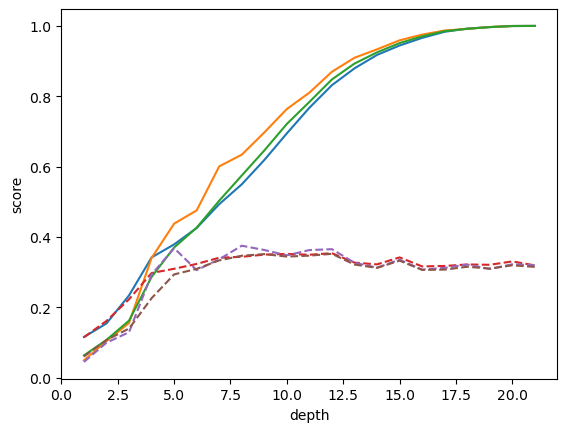

2 Fold ...


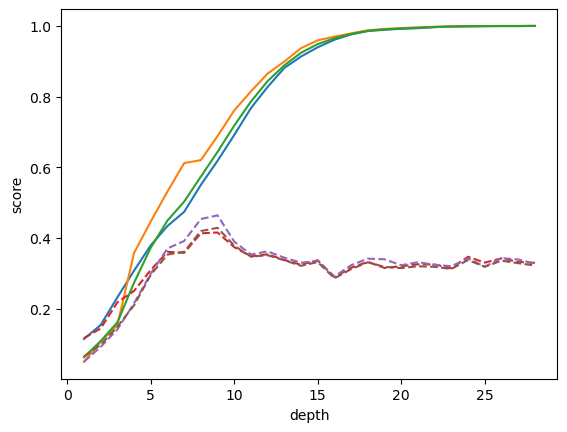

3 Fold ...


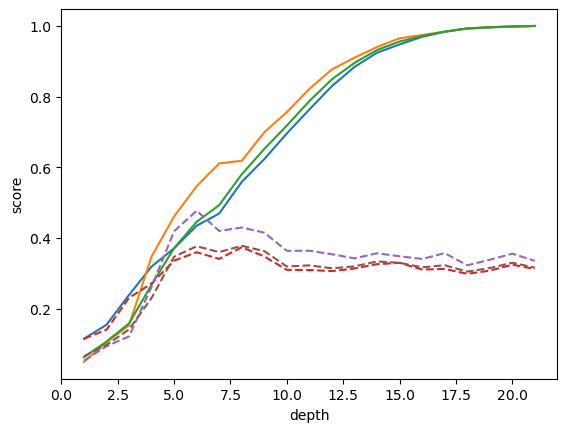

4 Fold ...


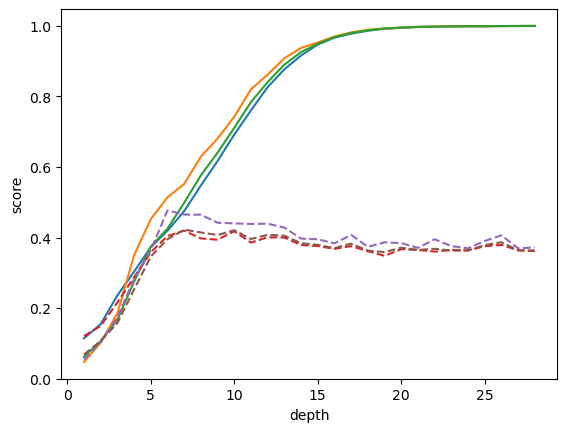

5 Fold ...


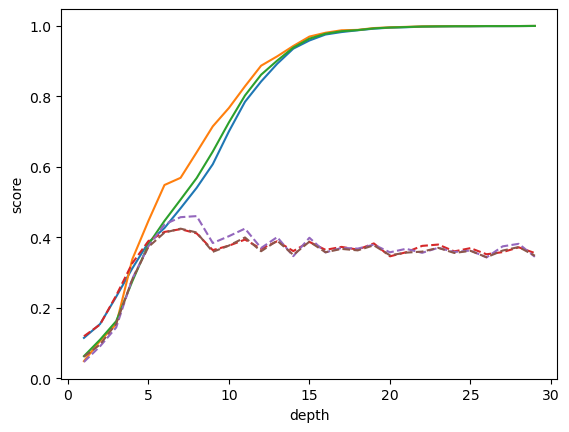

6 Fold ...


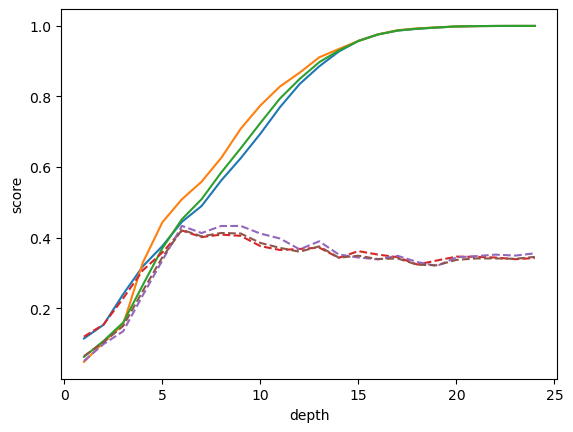

7 Fold ...


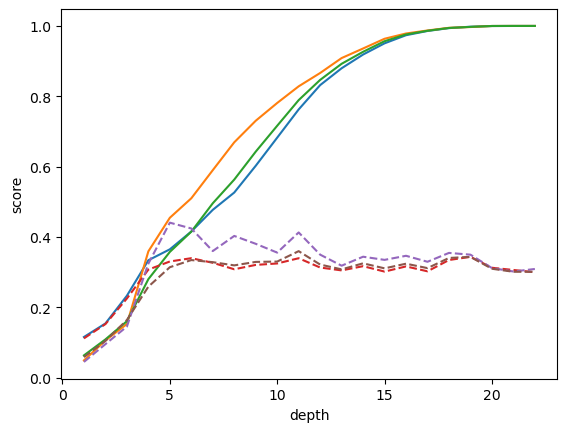

8 Fold ...


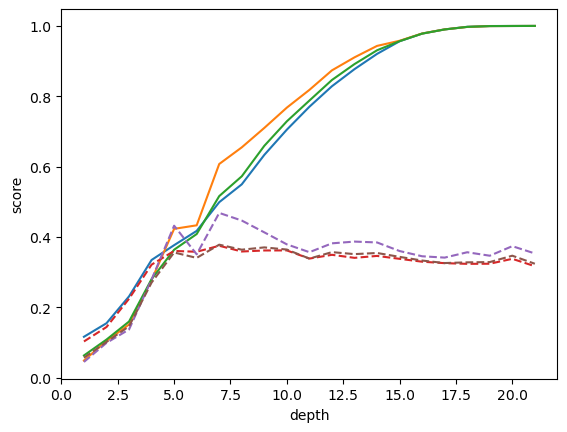

9 Fold ...


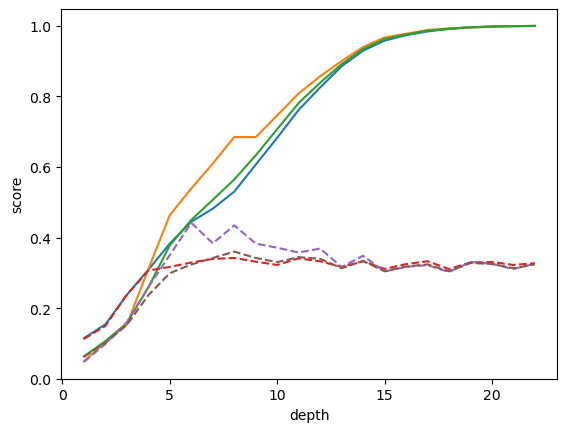

10 Fold ...


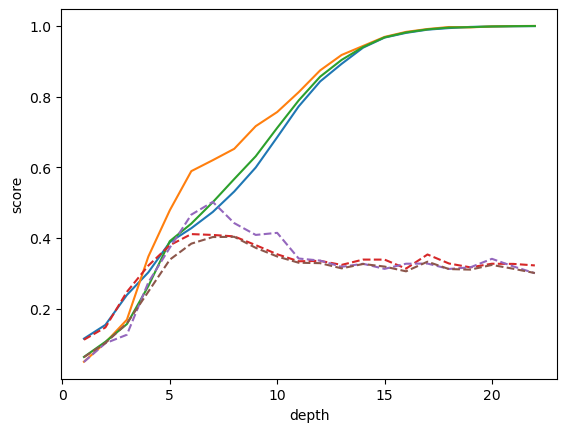

In [10]:
kf = KFold(n_splits = 10, shuffle = True, random_state = 42)
n_fold = 0
k_fold_result = []

for train_idx, valid_idx in kf.split(genre_pivot_df):
    model = DecisionTree(genre_pivot_df, embedding)
    model.validation = True
    n_fold += 1
    print(f'{n_fold} Fold ...')
    model.x_train, model.y_train = model.X[train_idx], model.Y[train_idx]
    model.x_valid, model.y_valid = model.X[valid_idx], model.Y[valid_idx]

    score_list, val_score_list = model.get_all_depth(scoring='all', visualize=False)

    r_list = [] 
    p_list = []
    f_list = []

    vr_list = [] 
    vp_list = []
    vf_list = []

    for score, val_score in zip(score_list, val_score_list):
        r_list.append(score[0])
        p_list.append(score[1])
        f_list.append(score[2])

        vr_list.append(val_score[0])
        vp_list.append(val_score[1])
        vf_list.append(val_score[2])

    plt.plot(range(1, len(score_list)+1), r_list, label='train recall')
    plt.plot(range(1, len(score_list)+1), p_list, label='train precision')
    plt.plot(range(1, len(score_list)+1), f_list, label='train f1-score')

    plt.plot(range(1, len(score_list)+1), vr_list, '--', label='test recall')
    plt.plot(range(1, len(score_list)+1), vp_list, '--', label='test precision')
    plt.plot(range(1, len(score_list)+1), vf_list, '--', label='test f1-score')

    plt.xlabel('depth')
    plt.ylabel('score')
    plt.show()